# Case Study: Fast Food

Case Study Objective: Understanding Market Segments and Brand Perceptions at McDonald's

Goal: Identify and analyze distinct consumer segments based on their perceptions of McDonald's. This analysis aims to discern whether there are systematic differences in how various segments perceive the McDonald's brand.

Focus:

Identify Positive Segments: Recognize segments that have a favorable view of McDonald's. Understand the key attributes contributing to this positive image and explore strategies to reinforce these perceptions.
Address Negative Perceptions: Identify segments that perceive McDonald's negatively. Analyze the main factors driving these adverse perceptions and develop actionable strategies to address and modify these views.
Utility:
This segmentation and perception analysis will help McDonald's tailor marketing strategies more effectively, focusing on enhancing brand image, improving customer satisfaction, and ultimately driving better business outcomes.

Method:
We will use clustering techniques to segment the consumer base ,PCA,   regression to identify the significant predictors of negative versus positive perceptions.

Data Attributes Used:

Food characteristics: 'yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting'
Consumer behaviors and demographics: 'Like', 'VisitFrequency', 'Age', 'Gender'


# Importing Important Libraries 

In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [195]:
df=pd.read_csv('mcdonalds.csv')

In [196]:
df.sample(5)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
786,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,Yes,No,I love it!+5,46,Once a month,Female
306,Yes,Yes,No,Yes,No,Yes,No,No,Yes,No,No,+2,43,Once a month,Female
896,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,Yes,No,+3,38,Once a week,Female
1216,Yes,Yes,No,Yes,Yes,Yes,No,Yes,No,No,No,+1,27,Once a year,Female
103,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,+4,57,Once a month,Female


In [197]:
df.shape

(1453, 15)

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [199]:
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [200]:
df.duplicated().value_counts()

False    1431
True       22
Name: count, dtype: int64

In [201]:
df.drop_duplicates(inplace=True)

In [202]:
df.shape

(1431, 15)

There is no missing values in dataset and there was 22 duplicate values which is now removed 

# Univariate Analysis

df['Age'].describe()

In [203]:
df['Age'].describe()

count    1431.000000
mean       44.656184
std        14.199400
min        18.000000
25%        33.000000
50%        45.000000
75%        57.000000
max        71.000000
Name: Age, dtype: float64

In [204]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]
print(f'The outliers are: {outliers}')

The outliers are: Empty DataFrame
Columns: [yummy, convenient, spicy, fattening, greasy, fast, cheap, tasty, expensive, healthy, disgusting, Like, Age, VisitFrequency, Gender]
Index: []


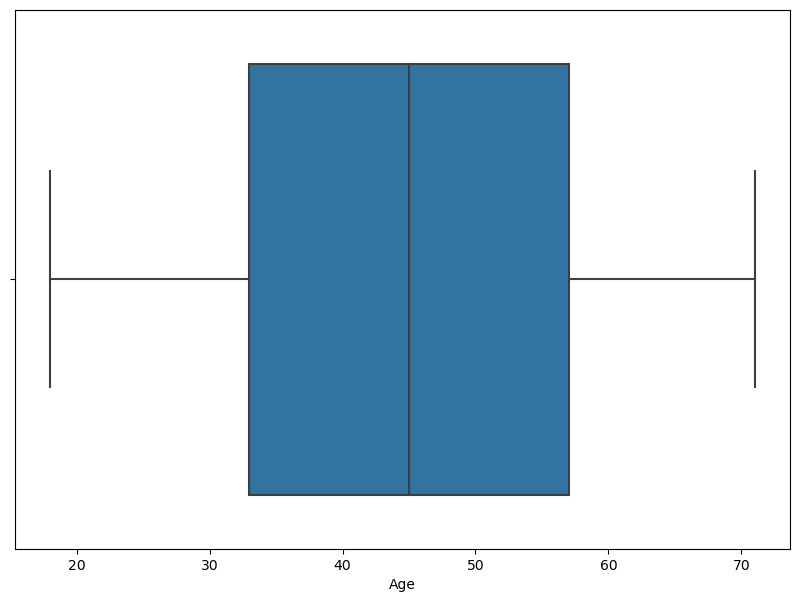

In [205]:
sns.boxplot(x=df['Age'])
plt.show()

In [206]:
age_18_25 = df[df['Age'].between(18, 25)]['Age'].count()
age_26_35 = df[df['Age'].between(26, 35)]['Age'].count()
age_36_45 = df[df['Age'].between(36, 45)]['Age'].count()
age_46_55 = df[df['Age'].between(46, 55)]['Age'].count()
age_55plus = df[df['Age'] >= 55]['Age'].count()

In [207]:
x_values = ['18-25', '26-35', '36-45', '46-55','56+']
counts = [age_18_25,age_26_35, age_36_45, age_46_55, age_55plus]

In [208]:
counts

[167, 271, 282, 313, 450]

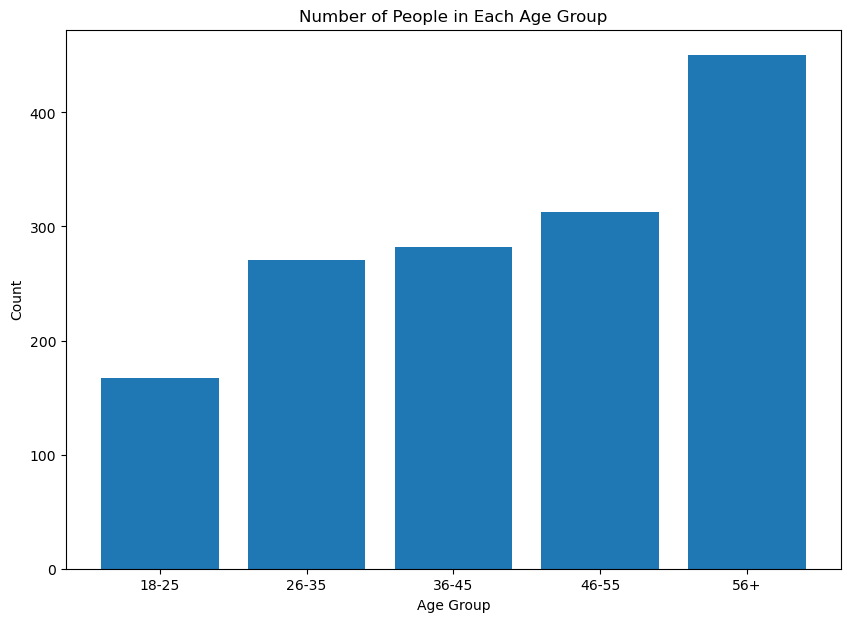

In [209]:
plt.bar(x_values, counts)

plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Number of People in Each Age Group')
plt.show()

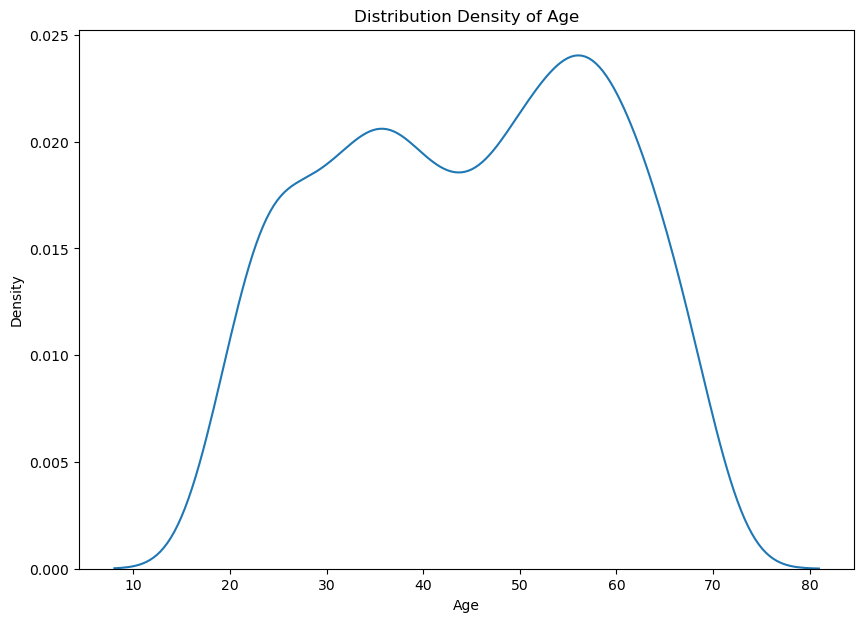

In [210]:
sns.kdeplot(data=df, x='Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Distribution Density of Age')
plt.show()

# Data Preprocessing


In [211]:
df_new = df.drop(labels=['Like','Age','VisitFrequency','Gender'], axis=1)


In [212]:
df_new.head()


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No


In [213]:
from sklearn.preprocessing import LabelEncoder

In [214]:
df_new_encoded = df_new.apply(LabelEncoder().fit_transform)
df_new_encoded.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


In [215]:
df_new_encoded=df_new_encoded.astype(int)

In [216]:
column_means = df_new_encoded.mean().round(2)

In [217]:
print("Column Means:")
print(column_means)

Column Means:
yummy         0.55
convenient    0.91
spicy         0.10
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


# PCA

Principal Component Analysis (PCA) is a statistical technique used to emphasize variation and bring out strong patterns in a dataset. It's often used to reduce dimensions while preserving as much variability as possible. The primary goal of PCA is to identify components (principal components) that explain the maximum amount of variance in a dataset.



In [218]:
pca_data=preprocessing.scale(df_new_encoded)
pca = PCA(n_components=11)
df_pca = pca.fit_transform(df_new_encoded)
print("PCA value: ",pca.explained_variance_ratio_)
print('standard deviation: ',np.sqrt(pca.explained_variance_ratio_))

PCA value:  [0.29899056 0.19156392 0.13267983 0.08290307 0.05969759 0.05069322
 0.04429957 0.03985029 0.03715547 0.03260161 0.02956487]
standard deviation:  [0.54680029 0.43768016 0.36425242 0.28792893 0.2443309  0.22515156
 0.21047463 0.19962538 0.19275754 0.18055916 0.17194438]


In [219]:
df_pc=pd.DataFrame(df_pca,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11'])
df_pc

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,0.419114,-0.231691,0.660553,-0.394399,0.200925,-0.391549,-0.213729,0.167607,0.179510,0.531101,-0.554209
1,-0.220189,0.393341,-0.729516,-0.102505,0.043964,-0.085099,-0.095786,-0.034779,0.110699,0.507822,-0.487602
2,0.371455,0.728362,-0.124168,0.683734,0.849209,-0.677356,0.581753,0.364017,-0.327911,0.050151,0.243132
3,-0.179665,-0.345683,-0.851313,0.204693,-0.680349,-0.036688,-0.056524,-0.232855,-0.024518,-0.247991,-0.056664
4,0.173971,-0.808123,0.016911,0.545781,0.860236,-0.083213,-0.456052,0.164836,-0.073457,0.027998,0.081264
...,...,...,...,...,...,...,...,...,...,...,...
1426,1.547013,0.263928,-0.014192,0.201105,-0.146572,0.309209,-0.076867,0.344021,-0.136215,-0.419146,-0.464879
1427,-0.963333,0.018977,0.298754,0.445180,-0.134964,0.391248,-0.330860,0.870713,-0.305065,-0.240094,-0.197849
1428,-0.182781,1.057798,0.229392,-0.470739,-0.191532,-0.199227,-0.093868,-0.033670,0.039346,0.057964,-0.012160
1429,-1.188787,-0.033521,0.555086,0.696727,0.047700,0.195972,-0.024075,-0.345070,0.023337,-0.000024,-0.107268


In [220]:
explained_variance_ratio = pca.explained_variance_ratio_
singular_values = pca.singular_values_
components = pca.components_

print("Standard deviation:\n", singular_values)
print("Proportion of Variance:\n", explained_variance_ratio)
print("Cumulative Proportion:\n", explained_variance_ratio.cumsum())

Standard deviation:
 [28.66313827 22.94308736 19.09402329 15.09316455 12.80776641 11.80238989
 11.03302894 10.46431362 10.10430344  9.46486702  9.01328256]
Proportion of Variance:
 [0.29899056 0.19156392 0.13267983 0.08290307 0.05969759 0.05069322
 0.04429957 0.03985029 0.03715547 0.03260161 0.02956487]
Cumulative Proportion:
 [0.29899056 0.49055448 0.62323431 0.70613738 0.76583497 0.81652819
 0.86082776 0.90067805 0.93783352 0.97043513 1.        ]


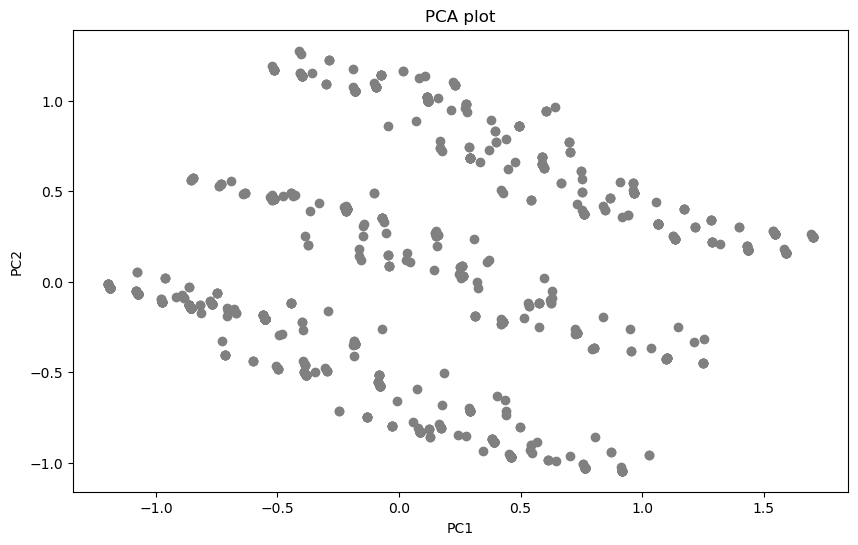

In [221]:
plt.figure(figsize=(10,6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c='grey')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA plot')
plt.show()

In [222]:
loadings = pca.components_
num_pc = pca.n_features_in_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['feature'] = df_new_encoded.columns.values
loadings_df = loadings_df.set_index('feature')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
feature,,,,,,,,,,,
yummy,-0.473652,0.370610,-0.301355,0.053818,-0.307839,0.170267,-0.278457,0.012604,0.574230,-0.107604,0.042649
convenient,-0.155302,0.016830,-0.062892,-0.144547,0.276766,-0.343663,-0.060092,-0.108304,-0.015511,-0.652477,-0.561015
spicy,-0.007448,0.019080,-0.039472,0.199271,0.073973,-0.353279,0.707035,0.381458,0.395773,-0.079203,0.140418
fattening,0.116058,-0.034366,-0.322261,-0.349149,-0.069891,-0.403426,-0.392024,0.590763,-0.160342,-0.011932,0.251830
greasy,0.303698,-0.057601,-0.802992,0.245048,0.362733,0.215346,0.038995,-0.141622,-0.002631,0.008337,0.001655
fast,-0.109396,-0.086865,-0.065928,-0.097602,0.112772,-0.598702,-0.085239,-0.625020,0.168059,0.228139,0.342411
cheap,-0.341107,-0.606855,-0.155916,0.123186,-0.127236,-0.101218,-0.040913,0.140513,0.073985,0.441522,-0.477097
tasty,-0.469349,0.312024,-0.285723,-0.006973,-0.211855,-0.079163,0.357405,-0.073368,-0.640410,0.075988,0.022303
expensive,0.333174,0.598525,0.028200,0.068841,-0.000381,-0.262920,-0.067548,0.031604,0.064168,0.466890,-0.477950


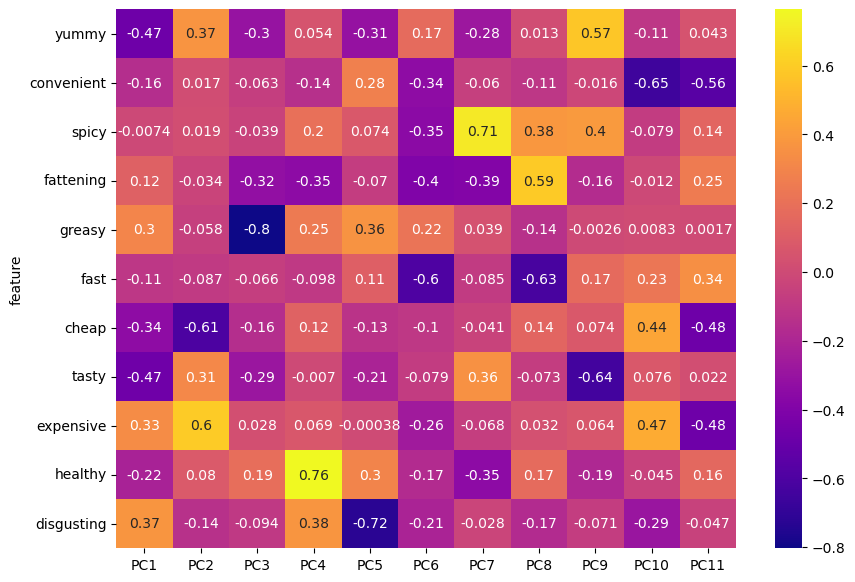

In [223]:
plt.rcParams['figure.figsize'] = (10,7)
ax = sns.heatmap(loadings_df, annot=True, cmap='plasma')
plt.show() 

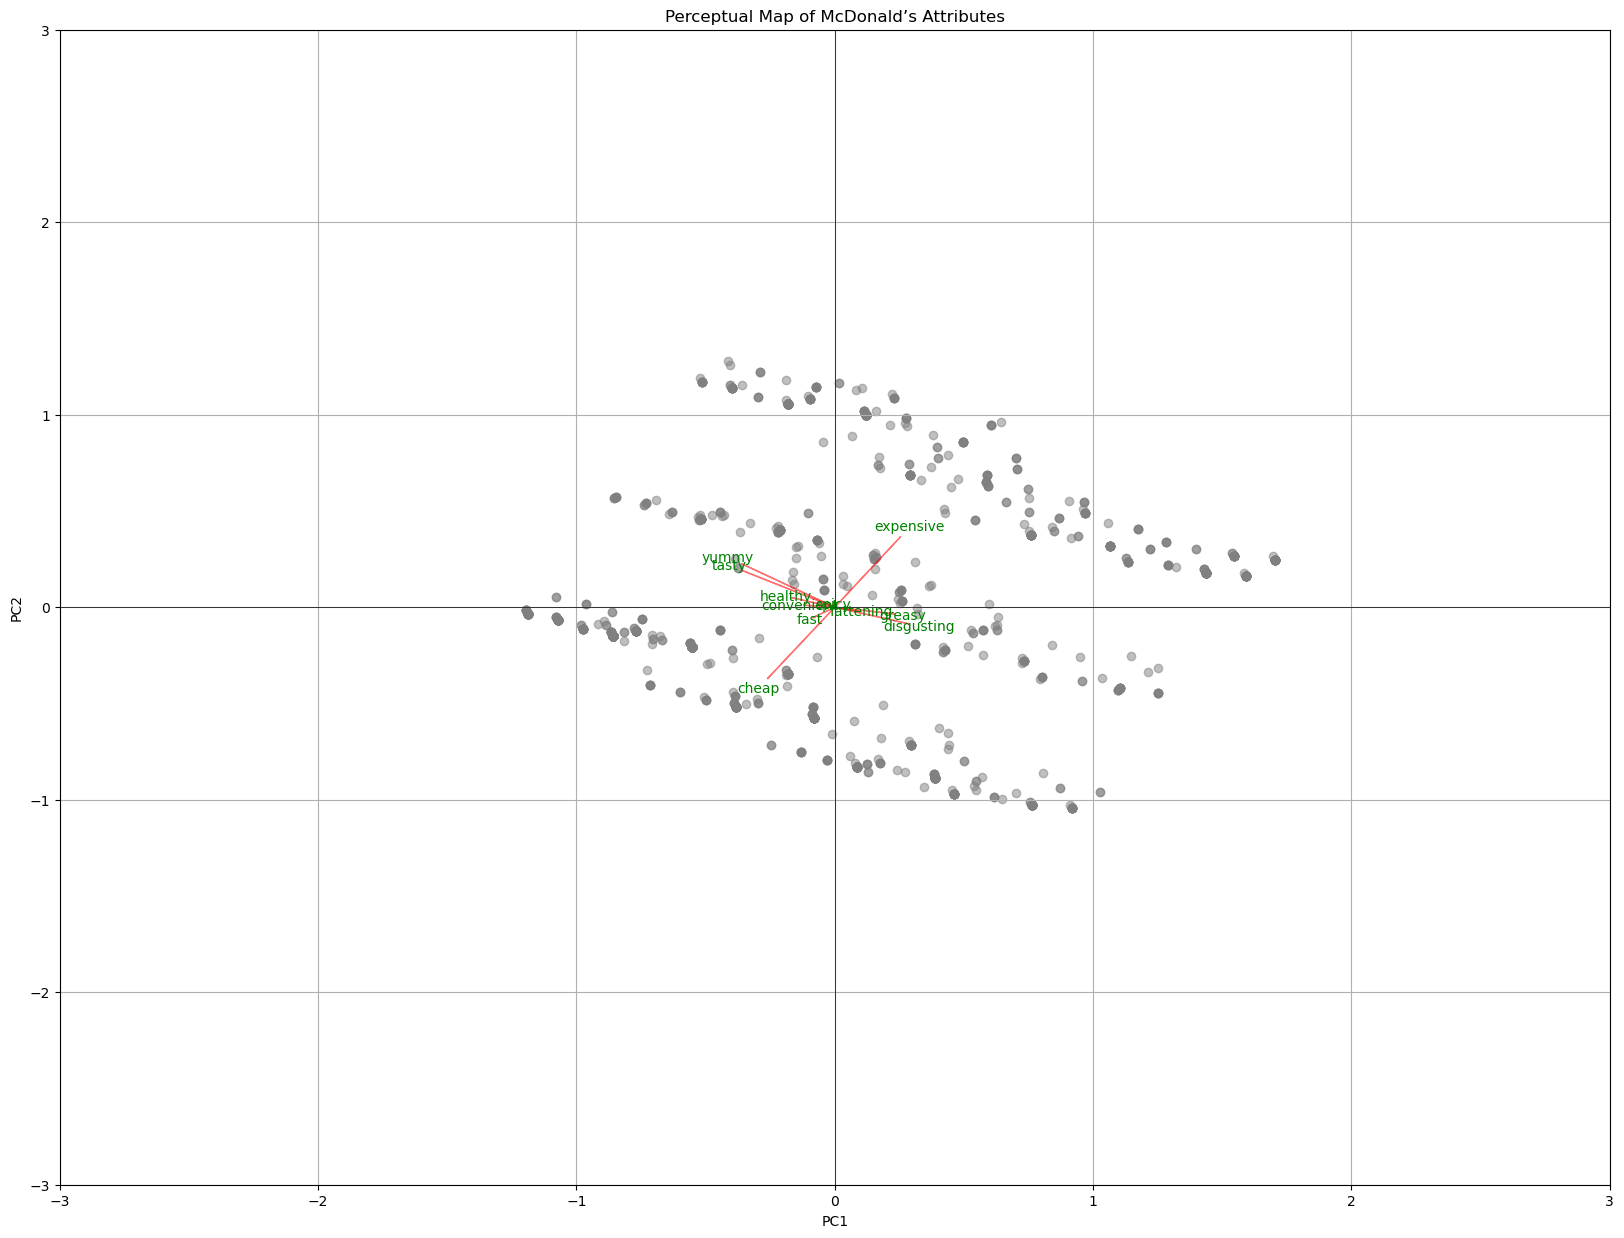

In [224]:
plt.figure(figsize=(20, 15))
plt.scatter(df_pca[:, 0], df_pca[:, 1], color='grey', alpha=0.5)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
for i, feature in enumerate(df_new_encoded.columns):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], color='red', alpha=0.5)
    plt.text(loadings[i, 0] * 1.15, loadings[i, 1] * 1.15, feature, color='g', ha='center', va='center')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Perceptual Map of McDonald’s Attributes')
plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.show()


# Extracting Segments

# Using KMeans

In [225]:
wcss=[]
for k in range(2,9):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(df_new_encoded)
    wcss.append(kmeans.inertia_)
print(wcss)

[2125.252924697942, 1854.9680771733645, 1590.1023758044867, 1504.6579035941088, 1329.4779412315875, 1240.305557632414, 1278.135455788803]


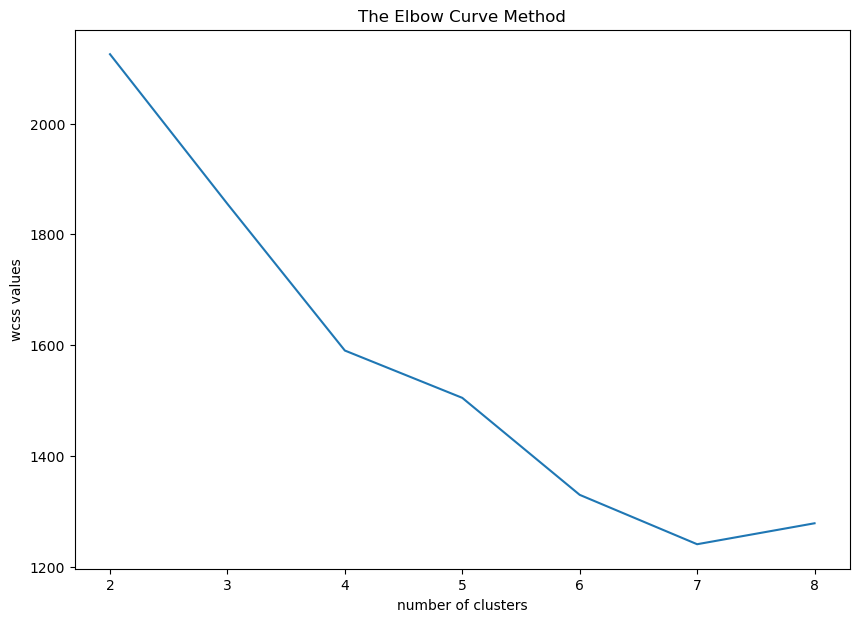

In [226]:
# visualize the Elbow Curve
plt.plot(range(2,9),wcss)
plt.xticks(range(2,9))
plt.title('The Elbow Curve Method')
plt.xlabel('number of clusters')
plt.ylabel('wcss values')
plt.show()

In [227]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_new_encoded)
df['cluster_num'] = kmeans.labels_

print ('Labels:', kmeans.labels_)
print ('WCSS:', kmeans.inertia_)
print('No. of iterations: ', kmeans.n_iter_)
print('Cluster centroids: ', kmeans.cluster_centers_)

Labels: [0 1 1 ... 1 3 2]
WCSS: 1699.9995072731904
No. of iterations:  8
Cluster centroids:  [[0.08421053 0.85789474 0.07894737 0.74210526 0.27894737 0.80526316
  0.10526316 0.22631579 0.60526316 0.14736842 0.14736842]
 [0.89491525 0.95932203 0.13898305 0.92542373 0.6779661  0.87457627
  0.11864407 0.95254237 0.93220339 0.21355932 0.16271186]
 [0.00837989 0.77094972 0.07541899 0.97486034 0.7849162  0.8603352
  0.67039106 0.06145251 0.32402235 0.04189944 0.69553073]
 [0.85544218 0.97959184 0.09013605 0.81122449 0.37414966 0.96428571
  0.94727891 0.9744898  0.0170068  0.30782313 0.04251701]]


In [228]:
from collections import Counter
print('Cluster size: ', Counter(kmeans.labels_))

Cluster size:  Counter({3: 588, 2: 358, 1: 295, 0: 190})


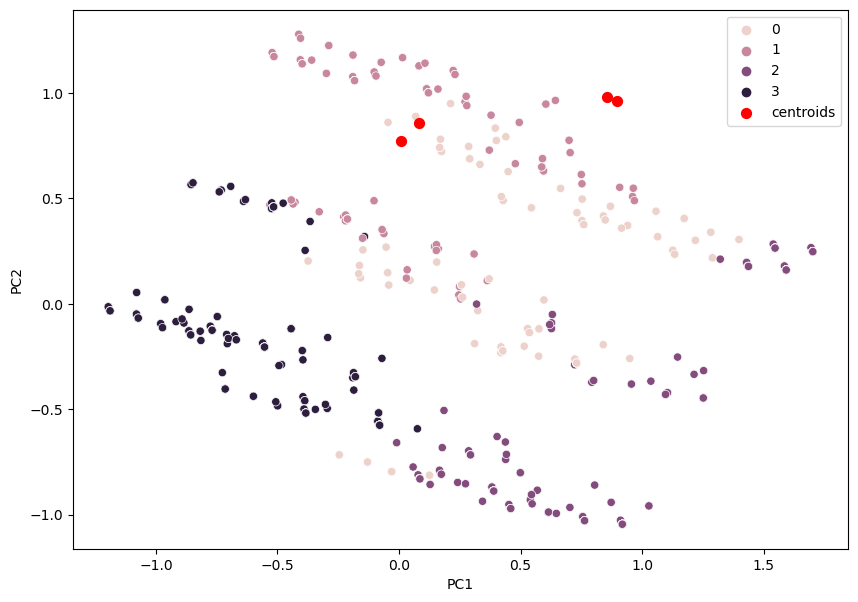

In [229]:
sns.scatterplot(x='PC1',y='PC2',data=df_pc,hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='r',s=50,label='centroids')
plt.legend()
plt.show()


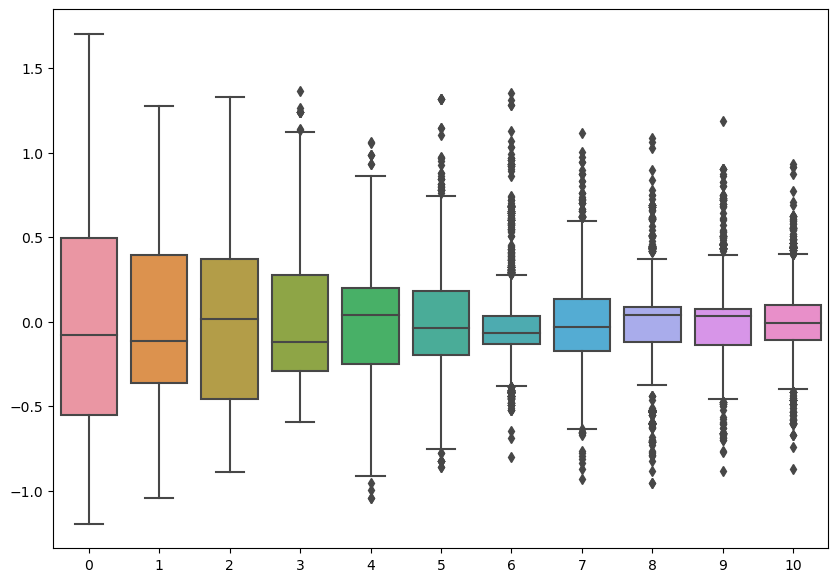

In [230]:
sns.boxplot(df_pca)
plt.show()

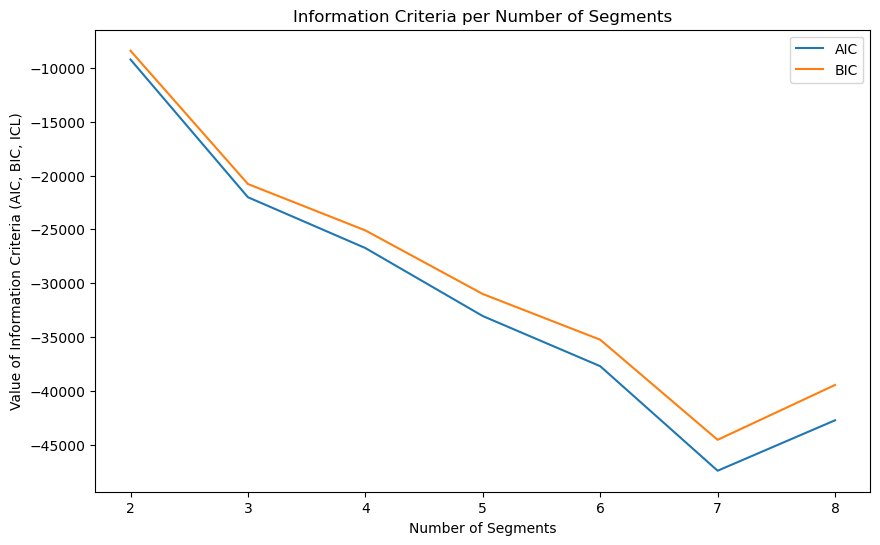

In [231]:
from sklearn.mixture import GaussianMixture
aic, bic, icl = [], [], []
n_components_range = range(2, 9)
for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(df_new_encoded)
    aic.append(gmm.aic(df_new_encoded))
    bic.append(gmm.bic(df_new_encoded))
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, aic, label='AIC')
plt.plot(n_components_range, bic, label='BIC')
plt.xlabel('Number of Segments')
plt.ylabel('Value of Information Criteria (AIC, BIC, ICL)')
plt.title('Information Criteria per Number of Segments')
plt.legend()
plt.show()


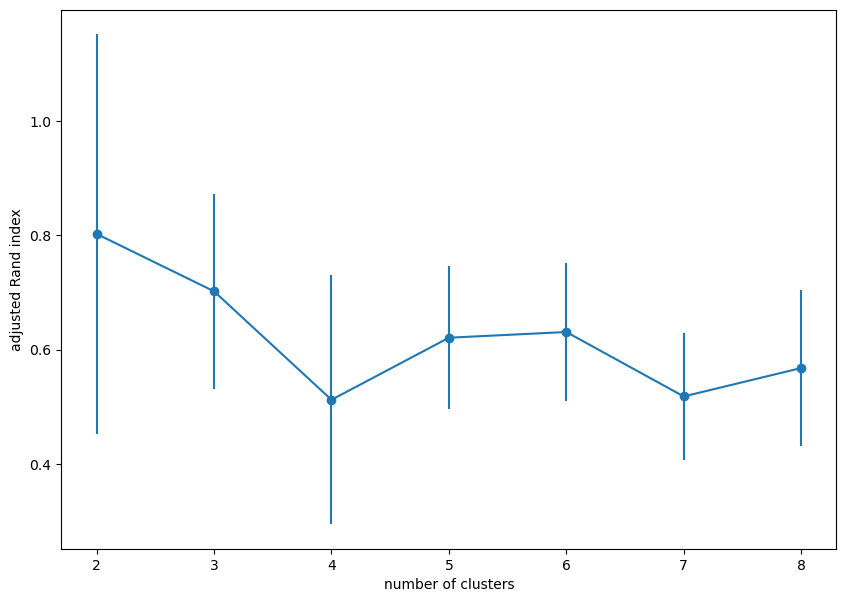

In [232]:
# set the random seed
np.random.seed(1234)

# perform K-means clustering with 2 to 8 clusters and 10 repetitions
n_clusters = range(2, 9)
n_reps = 10
scores = []
for k in n_clusters:
    km = KMeans(n_clusters=k, max_iter=300, n_init=n_reps).fit(df_new_encoded)
    km_labels = km.labels_
    score_k = []
    for i in range(n_reps):
        km_rep = KMeans(n_clusters=k, max_iter=300, n_init=1).fit(df_new_encoded)
        km_rep_labels = km_rep.labels_
        score_k.append(adjusted_rand_score(km_labels, km_rep_labels))
    scores.append(score_k)

# plot the adjusted Rand index scores for each number of clusters
plt.errorbar(n_clusters, np.mean(scores, axis=1), yerr=np.std(scores, axis=1), fmt="o-")
plt.xlabel("number of clusters")
plt.ylabel("adjusted Rand index")
plt.show()


In [233]:
# count the frequency of each value in the "Like" column
like_counts = df["Like"].value_counts()
like_counts = like_counts.iloc[::-1]
print(like_counts)

Like
-1               58
-2               59
-4               70
-3               73
I love it!+5    140
I hate it!-5    150
+1              152
+4              156
0               168
+2              180
+3              225
Name: count, dtype: int64


In [234]:
# convert the "Like" column to numeric and subtract from 6 to create a new column
df["Like.n"] = 6 - pd.to_numeric(df["Like"], errors="coerce")

# count the frequency of each value in the "Like.n" column
like_n_counts = df["Like.n"].value_counts()

# print the results
print(like_n_counts)

Like.n
3.0     225
4.0     180
6.0     168
2.0     156
5.0     152
9.0      73
10.0     70
8.0      59
7.0      58
Name: count, dtype: int64


In [235]:
from scipy.cluster.hierarchy import dendrogram, linkage


In [236]:
D = np.transpose(df_new_encoded)
D = linkage(D, method = "average")

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [25.0, 25.0, 42.5, 42.5],
  [10.0, 10.0, 33.75, 33.75],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [75.0, 75.0, 92.5, 92.5],
  [65.0, 65.0, 83.75, 83.75],
  [21.875, 21.875, 74.375, 74.375]],
 'dcoord': [[0.0, 15.132745950421556, 15.132745950421556, 0.0],
  [0.0, 13.784048752090222, 13.784048752090222, 0.0],
  [0.0, 16.76281577344289, 16.76281577344289, 13.784048752090222],
  [0.0, 23.56716713364229, 23.56716713364229, 16.76281577344289],
  [15.132745950421556,
   23.968548145468752,
   23.968548145468752,
   23.56716713364229],
  [0.0, 18.24828759089466, 18.24828759089466, 0.0],
  [0.0, 22.172201406011716, 22.172201406011716, 18.24828759089466],
  [0.0, 23.52566363772721, 23.52566363772721, 22.172201406011716],
  [0.0, 26.08767617745484, 26.08767617745484, 23.52566363772721],
  [23.968548145468752, 29.9744060504673, 29.9744060504673, 26.08767617745484]],
 'ivl': ['0', '7', 

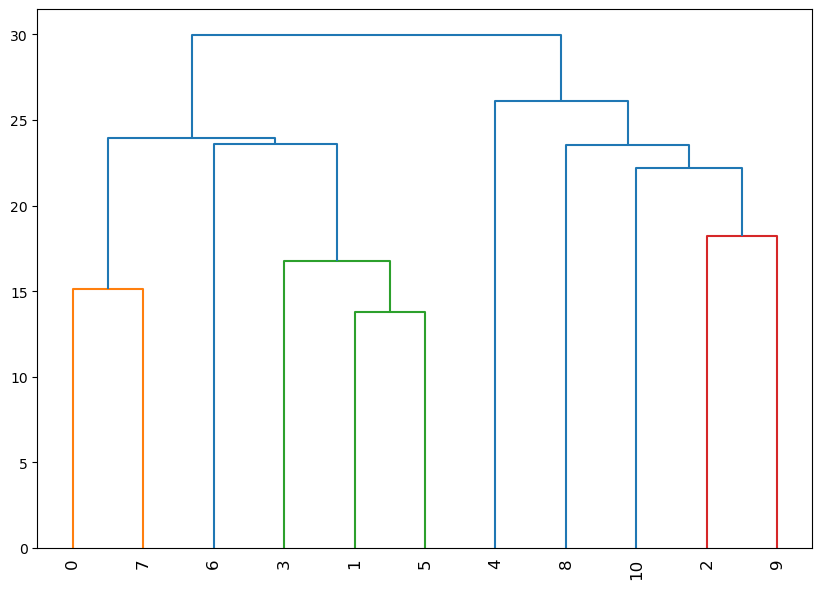

In [237]:
dendrogram(D, truncate_mode = "lastp", p = 12, leaf_rotation = 90,
           leaf_font_size = 12, show_contracted = True)

In [238]:
df['Like']

0                 -3
1                 +2
2                 +1
3                 +4
4                 +2
            ...     
1448    I hate it!-5
1449              +2
1450              +3
1451              +4
1452              -3
Name: Like, Length: 1431, dtype: object

In [239]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

crosstab =pd.crosstab(df['cluster_num'],df['Like'])
crosstab 


Like,+1,+2,+3,+4,-1,-2,-3,-4,0,I hate it!-5,I love it!+5
cluster_num,,,,,,,,,,,
0,25,17,15,7,15,14,14,11,43,27,2
1,34,49,65,43,5,7,8,4,30,8,42
2,24,25,7,0,21,29,46,50,45,111,0
3,69,89,138,106,17,9,5,5,50,4,96


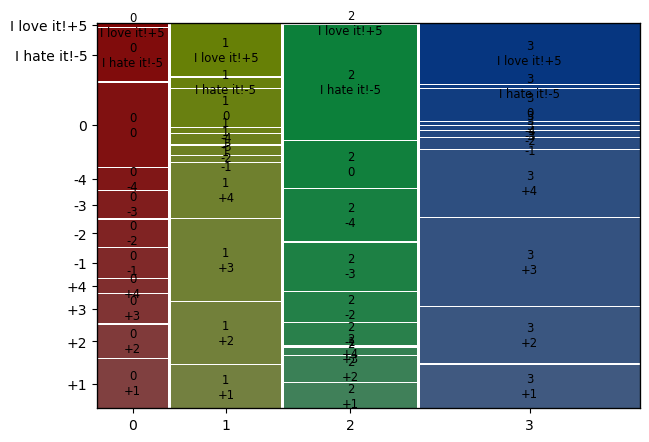

In [240]:
#MOSAIC PLOT
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab.stack())
plt.show()


In [241]:
#Mosaic plot gender vs segment
crosstab_gender =pd.crosstab(df['cluster_num'],df['Gender'])
crosstab_gender

Gender,Female,Male
cluster_num,,
0,87,103
1,143,152
2,187,171
3,355,233


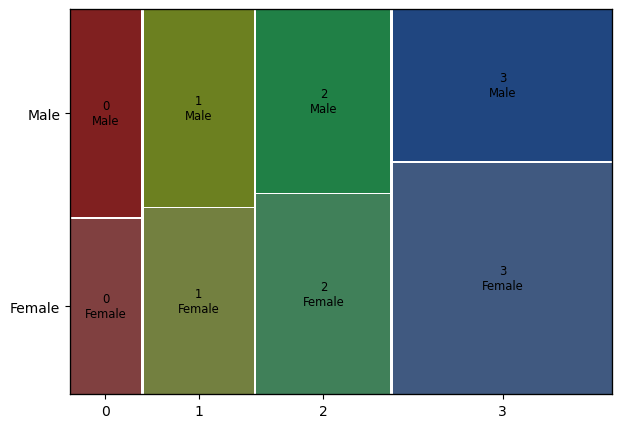

In [242]:
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab_gender.stack())
plt.show()

<Axes: xlabel='cluster_num', ylabel='Age'>

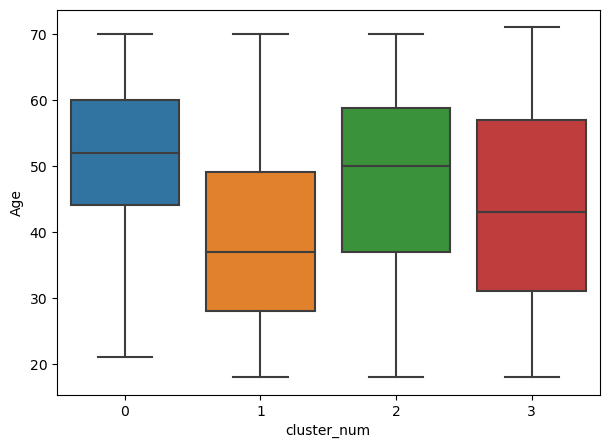

In [243]:
sns.boxplot(x="cluster_num", y="Age", data=df)

# Targeting  Segment


In [244]:
df['VisitFrequency'] = LabelEncoder().fit_transform(df['VisitFrequency'])
visit = df.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.605263
1,1,2.586441
2,2,2.729050
3,3,2.624150


In [245]:
df['Like'] = LabelEncoder().fit_transform(df['Like'])
Like = df.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,5.084211
1,1,3.969492
2,2,6.293296
3,3,3.838435


In [246]:
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
Gender = df.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.542105
1,1,0.515254
2,2,0.477654
3,3,0.396259


In [247]:
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment

,cluster_num,Gender,Like,VisitFrequency
0,0,0.542105,5.084211,2.605263
1,1,0.515254,3.969492,2.586441
2,2,0.477654,6.293296,2.729050
3,3,0.396259,3.838435,2.624150


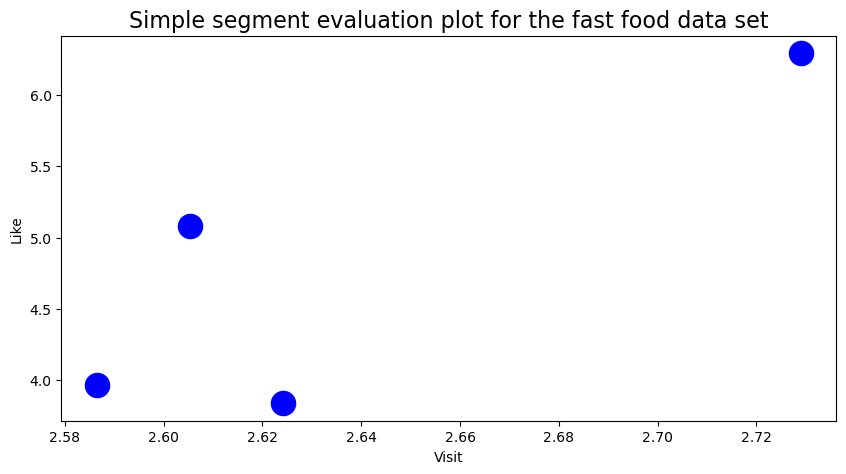

In [248]:
#Target segments

plt.figure(figsize = (10,5))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="blue")
plt.title("Simple segment evaluation plot for the fast food data set",
          fontsize = 16) 
plt.xlabel("Visit", fontsize = 10) 
plt.ylabel("Like", fontsize = 10) 
plt.show()
